# Nagel-Schreckenberg-Model

The model is as simple as they come. You have a road, divided into, e.g. $M=1000$ spots, and $N=500$ of these are occupied by cars. Each car follows three rules.

- If going slower than the speed limit, accelerate by 1 unit.
- If getting too close to the car in front, decelerate by enough units to avoid a crash.
- With a given probability $p$, reduce the speed by 1 unit.

If a car leaves the road on one side, it will go back in from the other one. It’s called periodic boundary conditions.

In [1]:
from random import uniform, shuffle
import matplotlib.pyplot as plt
import numpy as np
 
L = 1000 # number of cells in row
num_iters = 1000 # number of iterations
density = 0.05 # how many positives
vmax = 5
p = 1/3

In [2]:
def ns_model(initial, num_iters, L, vmax, p):
    iterations = [initial]

    for i in range(num_iters):
        prev,curr = iterations[-1],[-1] * L

        for x in range(L):
            if prev[x] > -1:
                vi = prev[x]
                d = 1
                while prev[(x + d) % L] < 0:
                    d += 1

                vtemp = min(vi+1, d - 1, vmax) # increse speed up to max speed, but don't move further than next car
                v = max(vtemp - 1, 0) if uniform(0,1) < p else vtemp # with probability p hit the brakes, otherwise sustain velocity
                curr[(x + v) % L] = v # perform the move
                #print(x,v)

        iterations.append(curr)
    return iterations

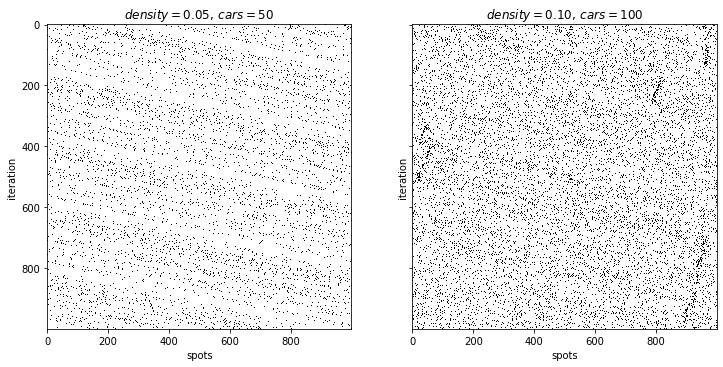

In [3]:
def plot_system(density, num_iters, L, vmax, p, ax=None):
    cars_num = int(density * L)
    initial = [0] * cars_num + [-1] * (L - cars_num)
    shuffle(initial)

    iterations = ns_model(initial, num_iters, L, vmax, p)
    
    a = np.zeros(shape=(num_iters,L))
    for i in range(L):
        for j in range(num_iters):
            a[j,i] = 1 if iterations[j][i] > -1 else 0
 
    # showing image
    ax.imshow(a, cmap="Greys", interpolation="nearest")
    ax.set_title(f"$density={density:.2f}, \, cars={cars_num:.0f}$")
    ax.set_xlabel('spots')
    ax.set_ylabel('iteration')
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(0.05, num_iters, L, vmax, p, ax=ax1)
plot_system(0.1, num_iters, L, vmax, p, ax=ax2)

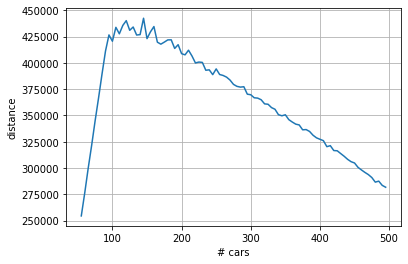

In [4]:
x = np.arange(55,500,5)
y = []

for cars_num in range(55,500,5):
    initial = [0] * cars_num + [-1] * (L - cars_num)
    shuffle(initial)

    iterations = ns_model(initial, num_iters, L, vmax, p)
    
    a = np.zeros(shape=(num_iters,L))
    for i in range(L):
        for j in range(num_iters):
            a[j,i] = iterations[j][i] if iterations[j][i] > -1 else 0
            
    #print(a.sum())
    y.append(a.sum())
    
plt.plot(x,y)
plt.grid(True)
plt.xlabel('# cars')
plt.ylabel('distance')
plt.show()